# A Comprehensive Guide to Decision Trees


**Purpose:** In this guide, we will delve into the fundamentals of Decision Trees, exploring how they work, their advantages and disadvantages, and practical implementation techniques. By the end of this guide, you will have a comprehensive understanding of Decision Trees and be equipped to apply them to various machine learning problems.

**Dataset:** We will be using a loan classification dataset. This dataset contains various demographic and financial features that could be used to build a classification model for predicting loan approval or denial. The loan_status column serves as the target variable for the classification task.

Happy learning 😊

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

To keep things clear and simple in this tutorial, we will reduce the number of rows and features


In [2]:
# https://www.kaggle.com/datasets/yakhyojon/customer-satisfaction-in-airline/data
# the label is 'satisfaction'
df = pd.read_csv('./dataset/Invistico_Airline.csv')


# To keep things simple in this tutorial,
# We will only use categorical features for decision tree
df = df[['Class','Seat comfort','Food and drink','Cleanliness','satisfaction']]


df

,Class,Seat comfort,Food and drink,Cleanliness,satisfaction
0,Eco,0,0,3,satisfied
1,Business,0,0,3,satisfied
2,Eco,0,0,4,satisfied
3,Eco,0,0,1,satisfied
4,Eco,0,0,2,satisfied
...,...,...,...,...,...
129875,Eco,5,5,4,satisfied
129876,Business,2,2,2,dissatisfied
129877,Eco,3,3,3,dissatisfied
129878,Eco,3,3,1,dissatisfied


# 1. Introduction

Decision Trees are one of the most intuitive and versatile tools in the field of machine learning. They are used for both classification and regression tasks, making them a fundamental technique that every data scientist should understand.

### What is a Decision Tree?
A Decision Tree is a flowchart-like structure in which each internal node represents a decision based on the value of a feature, each branch represents the outcome of the decision, and each leaf node represents a class label (in classification tasks) or a continuous value (in regression tasks). The paths from the root to the leaf represent classification rules or regression models.

### Why Use Decision Trees?
Decision Trees are popular due to their simplicity and interpretability. Unlike other complex models, Decision Trees mimic human decision-making processes, making it easy to understand and explain the results. They require minimal data preprocessing, can handle both numerical and categorical data, and are capable of capturing non-linear relationships between features and the target variable.

### Task 🎖️

Build a Classification Decision Tree to determine if a loan will be approved or not based on features such as age, gender, occupation, education level, marital status, income, and credit score.

# 2. Basic Concepts

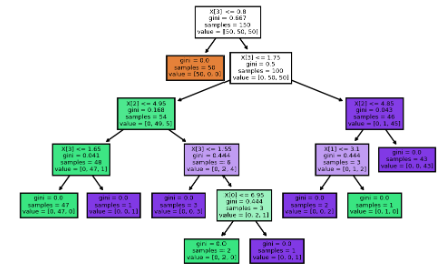
<br>*Source: Wikimedia Commons*

* <b>Root Node</b>: Define the starting point of the tree.
* <b>Leaf Nodes</b>: Explain the endpoints or outcomes of the tree.
* <b>Decision Nodes</b>: Describe nodes where a decision or split is made.
* <b>Branches</b>: Clarify the connections between nodes, representing outcomes of decisions.

# 3. Types of Decision Trees

* Classification Trees (CART): Used for categorical target variables.
* Regression Trees: Used for continuous target variables.

Since our target label `loan_status` is categorical (predicting "Approved" / "Denied"), we will use a Classification Tree.

# 4. How Decision Trees Work
Decision trees are usually constructed in a top-down, recursive manner, starting from the root node. At each node, the algorithm selects the feature that best splits the data based on a chosen splitting criterion. At each step, it selects the best split locally, without considering future steps, resulting in a series of greedy decisions. The process continues until a stopping criterion is met.  

In [3]:
df

,Class,Seat comfort,Food and drink,Cleanliness,satisfaction
0,Eco,0,0,3,satisfied
1,Business,0,0,3,satisfied
2,Eco,0,0,4,satisfied
3,Eco,0,0,1,satisfied
4,Eco,0,0,2,satisfied
...,...,...,...,...,...
129875,Eco,5,5,4,satisfied
129876,Business,2,2,2,dissatisfied
129877,Eco,3,3,3,dissatisfied
129878,Eco,3,3,1,dissatisfied


# 5. Tree Construction

In our df, it can be seen that there is a clear threshold (split) using `credit_score` and `age` for loan decision. Credit scores below 650 are denied and credit scores above 650 are approved.

Let's break down how a decision tree would operate in this scenario.

    1. Root Node: The root node of the decision tree would consider the `credit_score` feature.

    2. Splitting Criterion: The decision tree algorithm would evaluate different splitting criteria (explained below) to determine the optimal threshold for dividing the dataset. However, since there's a clear split at 650 (low entropy), the decision tree would choose this threshold.

    3. Child Nodes: The tree would then have two child nodes: one for credit scores below 650 and another for scores above 650.

    4. Leaf Nodes: These child nodes would represent the final decision outcomes. For scores below 650, the leaf node would indicate denial, while for scores above 650, the leaf node would indicate approval.

    5. No Further Splitting: Since credit score is the only relevant feature and there's a clear threshold, the decision tree would not require further splitting or evaluation of additional features.
    
Therefore, while we can refer to credit_score to guide our loan approval decisions, for learning purposes, we will exclude `credit_score` to build our Decision Tree

Although the `credit_score` serves as a decisive factor in loan approval, for educational purposes, we'll construct a decision tree without considering it. 

By excluding the credit_score feature, the decision tree would rely on other factors such as `gender`, `age`, and `education_level` to make loan approval decisions. This approach allows us to understand how different features contribute to decision-making and provides insight into alternative decision pathways beyond `credit_score`.

Now, there is no single feature with a clear split. This is where Decision Trees could be valuable - by identifying complex decision boundaries by recursively splitting data based on multiple features until homogeneous subsets are achieved

In [4]:
# Preprocessing

# one hot encoding
from sklearn.preprocessing import LabelEncoder

df_final = df
# 使用 LabelEncoder 处理每一列
for col in df_final.columns[:-1]:
    df_final[col] = LabelEncoder().fit_transform(df_final[col])

In [5]:
print(df_final.columns,df.columns)

Index(['Class', 'Seat comfort', 'Food and drink', 'Cleanliness',
       'satisfaction'],
      dtype='object') Index(['Class', 'Seat comfort', 'Food and drink', 'Cleanliness',
       'satisfaction'],
      dtype='object')


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

# split data into features and labels
X = df_final.drop('satisfaction', axis=1)
y = df_final['satisfaction']

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# create a Decision Tree Classifier model
clf = DecisionTreeClassifier()

# train the model
clf = clf.fit(X_train, y_train)

In [7]:
print(X.columns,clf.classes_)

Index(['Class', 'Seat comfort', 'Food and drink', 'Cleanliness'], dtype='object') ['dissatisfied' 'satisfied']


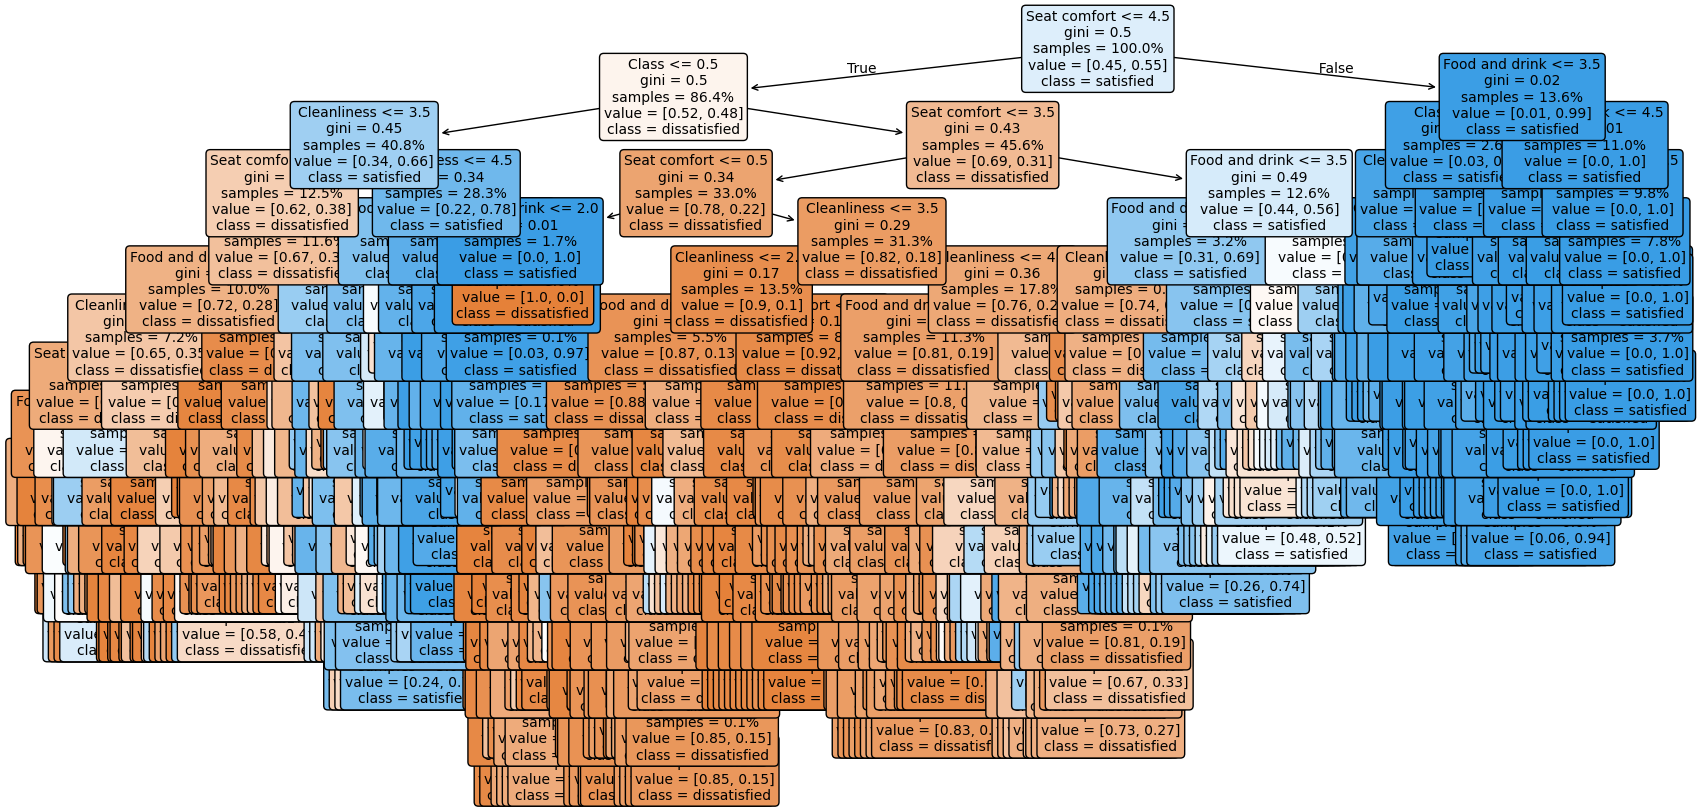

In [8]:
def plot_decision_tree(model, feature_names, class_names):
    tree = plot_tree(model, feature_names = feature_names, class_names = class_names,
                     rounded = True, proportion = True, precision = 2, filled = True, fontsize=10)
    
    return tree

plt.figure(figsize=(20,10))
plot_decision_tree(clf, X.columns, clf.classes_)
plt.show()

### Interpreting the results

In our tree, there are 2 layers, 2 splits, 1 root node, and 3 leaf nodes.

The tree starts by looking at the person's age. If their age is below a certain point, it checks their education level. If they have a Doctoral degree, they're approved. Otherwise, they're denied. If their age is above that point, they're approved straight away.

In our case, the decision tree analysis reveals a straightforward process with clear splits emerging after just two steps. (note: clear-cut splits are rare)

# 6. Feature importances

Which features are the most important in dividing the data?

In [9]:
feature_importance = clf.feature_importances_
print("Feature Importance:")
for i, importance in enumerate(feature_importance):
    print(f"{X.columns[i]}: {importance}")

Feature Importance:
Class: 0.22271490261037608
Seat comfort: 0.5311245661453435
Food and drink: 0.08630297852792097
Cleanliness: 0.15985755271635946


In [10]:
# Prediction
y_pred = clf.predict(X_test)

In [11]:
results = pd.DataFrame({
    'Predicted': y_pred,
    'Actual': y_test
})

results

,Predicted,Actual
103044,satisfied,satisfied
43282,dissatisfied,dissatisfied
65543,satisfied,satisfied
65083,satisfied,satisfied
76496,dissatisfied,dissatisfied
...,...,...
120877,satisfied,satisfied
93478,satisfied,satisfied
124691,satisfied,satisfied
24899,satisfied,satisfied


We can now view the evaluation metrics (accuracy, precision, recall, F1) using `confusion_matrix` from sklearn. (can also be manually calculated by extracting tp, tn, fp, fn counts)

In [12]:
from sklearn.metrics import confusion_matrix,accuracy_score

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:", conf_matrix)
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Confusion Matrix: [[11434  3174]
 [ 2832 15030]]
Accuracy: 0.815029257776409


A `classification_report` is helpful too

In [13]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

dissatisfied       0.80      0.78      0.79     14608
   satisfied       0.83      0.84      0.83     17862

    accuracy                           0.82     32470
   macro avg       0.81      0.81      0.81     32470
weighted avg       0.81      0.82      0.81     32470



The model scored high across all metrics - accuracy, precision, recall, weighted F1 avg.

# 12. Hyperparameter Tuning

Finally, hyperparameter tuning is crucial for optimizing the performance of machine learning models. It involves selecting the best set of hyperparameters, which are parameters that control the learning process of the model and are not learned from the data. Two common techniques for hyperparameter tuning are `Grid Search` and `Random Search`.

* Grid Search: Grid Search is an exhaustive search technique that evaluates the model's performance for all possible combinations of hyperparameters within a predefined grid. It's computationally expensive but guarantees finding the best hyperparameters within the specified search space.

* Random Search: Random Search selects hyperparameters randomly from the search space and evaluates the model's performance for a specified number of iterations. It's less computationally intensive than Grid Search but may not find the optimal hyperparameters as quickly.

Cross-validation is a fundamental practice in machine learning model development, and it's highly recommended regardless of the specific modeling task. This is to ensure that the model's performance estimates are reliable and generalize well to unseen data.

Let's see how `GridSearchCV` can be implemented

In [14]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV

# define hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]    
}

clf = DecisionTreeClassifier()

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# print best parameters found
print("Best parameters:", grid_search.best_params_)

Best parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}


In [15]:
# get the best model
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

dissatisfied       0.80      0.78      0.79     14608
   satisfied       0.83      0.84      0.83     17862

    accuracy                           0.82     32470
   macro avg       0.81      0.81      0.81     32470
weighted avg       0.81      0.82      0.81     32470



In [16]:
accuracy_scores = grid_search.cv_results_['mean_test_score']
accuracy_scores

array([0.8153783 , 0.8153783 , 0.81542963, 0.8154091 , 0.8154091 ,
       0.8154091 , 0.8154091 , 0.8154091 , 0.8154091 , 0.79636588,
       0.79636588, 0.79636588, 0.79636588, 0.79636588, 0.79636588,
       0.79634534, 0.79634534, 0.79634534, 0.8092393 , 0.8092393 ,
       0.80928036, 0.80922903, 0.80922903, 0.80922903, 0.8091469 ,
       0.8091469 , 0.8091469 , 0.8153783 , 0.8153783 , 0.81542963,
       0.8154091 , 0.8154091 , 0.8154091 , 0.8154091 , 0.8154091 ,
       0.8154091 , 0.8153783 , 0.8153783 , 0.81545016, 0.81542963,
       0.81542963, 0.81542963, 0.8154091 , 0.8154091 , 0.8154091 ,
       0.79673545, 0.79673545, 0.79673545, 0.79673545, 0.79673545,
       0.79673545, 0.79671492, 0.79671492, 0.79671492, 0.8092393 ,
       0.8092393 , 0.80928036, 0.80925983, 0.80925983, 0.80925983,
       0.80918797, 0.80918797, 0.80918797, 0.8153783 , 0.8153783 ,
       0.81545016, 0.81542963, 0.81542963, 0.81542963, 0.8154091 ,
       0.8154091 , 0.8154091 ])

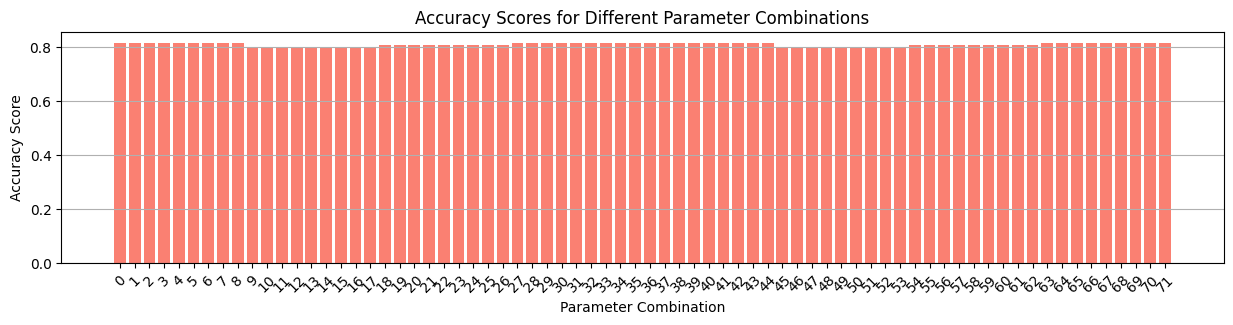

In [17]:
# plot the accuracy scores across different parameters combinations
plt.figure(figsize=(15,3))
plt.bar(range(len(accuracy_scores)), accuracy_scores, color='salmon')
plt.xlabel('Parameter Combination')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Different Parameter Combinations')
plt.xticks(range(len(accuracy_scores)), rotation=45)
plt.grid(axis='y')
plt.show()